This is the simplest use of markov chains I could think of, snakes and ladders and this is the simplist snakes and ladders board ever. 
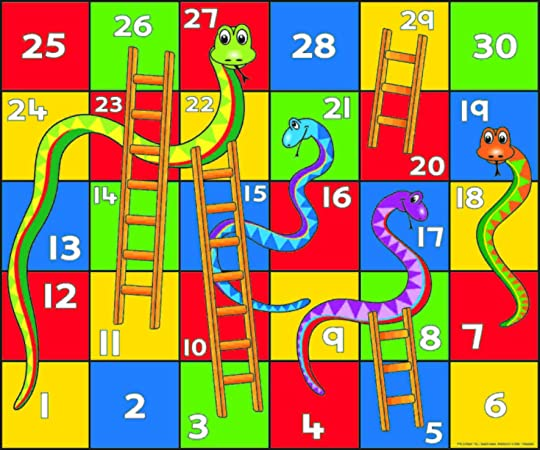
The objectives are to:
-find the transition matrix
-find the probability at any given turn of the game being won (perhaps already at a previous turn)
-tell who is more likely to win given 2 players positions

In [2]:
import numpy

I will find the transition matrix (30x20) by using the product of 2 matricies:
-a matrix that represents ladder and snake square to square movements
-a matrix that represents dice square to square movements

In [3]:
# each element represents a snake or a ladder and a starting and finishing square
SL_movements = (
    (27, 1),
    (21, 9),
    (19, 7),
    (17, 4),
    
    (3, 22),
    (5, 8),
    (11, 26),
    (20, 29)
)


In [4]:
# I will create the snakes and ladders transition matrix by modifying the identity 30 matrix to add in the effect of each snake and ladder
# called up down matrix
up_down_M: numpy.array = numpy.identity(30)

In [5]:
for start, end in SL_movements:
    up_down_M[start][start] = 0
    up_down_M[start][end] = 1


In [6]:
for row in up_down_M:
    print(" ,".join([str(e) for e in row]))


1.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0
0.0 ,1.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0
0.0 ,0.0 ,1.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0
0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,1.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0
0.0 ,0.0 ,0.0 ,0.0 ,1.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0
0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,1.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0
0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,1.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0

In [7]:
def p_SQ_given_pre_roll_SQ(sq, pre_roll_sq):
    """Given the current square is 5 the probability of rolling and landing on 6 is 1/6 but 12 is 0
    signiffied by:
    p_SQ_given_pre_roll_SQ(6, 5) -> 1/6
    p_SQ_given_pre_roll_SQ(12, 5) -> 0
    
    The obvious special case is if sq is 24 to 28 as you must roll exactly to get to 29 (base 0 so 29 is last square)
    """
    assert 0 <= sq < 30
    assert 0 <= pre_roll_sq < 30
    
    if pre_roll_sq == 30:
        if sq == 30:
            return 1
        else:
            return 0

    if sq in range(pre_roll_sq+1, pre_roll_sq+7):
        return 1/6
    if sq == pre_roll_sq:
        # over_shoot_rolls = 6-(29-sq)
        over_shoot_rolls = sq-23
        if over_shoot_rolls >0:
            return over_shoot_rolls/6
    return 0


In [8]:
along_list = [[None]*30  for row in range(30)]

In [9]:
for row in range(30):
    print(f"[{' ,'.join(str(p_SQ_given_pre_roll_SQ(sq=col, pre_roll_sq=row)) for col in range(30))}]")

[0 ,0.16666666666666666 ,0.16666666666666666 ,0.16666666666666666 ,0.16666666666666666 ,0.16666666666666666 ,0.16666666666666666 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0]
[0 ,0 ,0.16666666666666666 ,0.16666666666666666 ,0.16666666666666666 ,0.16666666666666666 ,0.16666666666666666 ,0.16666666666666666 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0]
[0 ,0 ,0 ,0.16666666666666666 ,0.16666666666666666 ,0.16666666666666666 ,0.16666666666666666 ,0.16666666666666666 ,0.16666666666666666 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0]
[0 ,0 ,0 ,0 ,0.16666666666666666 ,0.16666666666666666 ,0.16666666666666666 ,0.16666666666666666 ,0.16666666666666666 ,0.16666666666666666 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0]
[0 ,0 ,0 ,0 ,0 ,0.16666666666666666 ,0.16666666666666666 ,0.16666666666666666 ,0.16666666666666666 ,0.16666666666666666 ,0.16666666666666666 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0]
[0 ,0

In [10]:
for row in range(30):
    for col in range(30):
        along_list[row][col] = p_SQ_given_pre_roll_SQ(sq=col, pre_roll_sq=row)


In [11]:
along_M: numpy.array = numpy.array(along_list)


In [12]:
transition_M: numpy.array = up_down_M.dot(along_M)


In [13]:
for row in transition_M:
    print(" ,".join([str(e) for e in row]))


0.0 ,0.16666666666666666 ,0.16666666666666666 ,0.16666666666666666 ,0.16666666666666666 ,0.16666666666666666 ,0.16666666666666666 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0
0.0 ,0.0 ,0.16666666666666666 ,0.16666666666666666 ,0.16666666666666666 ,0.16666666666666666 ,0.16666666666666666 ,0.16666666666666666 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0
0.0 ,0.0 ,0.0 ,0.16666666666666666 ,0.16666666666666666 ,0.16666666666666666 ,0.16666666666666666 ,0.16666666666666666 ,0.16666666666666666 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0
0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.0 ,0.16666666666666666 ,0.16666666666666666 ,0.16666666666666666 ,0.16666666666666666 ,0.16666666666666666 ,0.16666666666666666 ,0.0
0.0 ,0.0 ,0.0 ,0.0 ,

In [14]:
starting_M = numpy.array([1]+[0]*29)


In [15]:

def game_state(turn: int)-> numpy.array:
    pass